In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

The three reactions to be simulated:

Polystyrene -> Styrene

Polystyrene -> Toluene

Polystyrene -> Ethylbenzene (Benzene)

Brian Lejeune/Prof. West

In [2]:
#Polystyrene Properties

PS_MW = 311600
PS_Polydisperity = 2.39
PS_Density = 1030 #kg/m^3
PS_HeatVal = 49 #MJ/kg

#Source Paper Reactor Properties

Rctr_Pressure = 10^(-1) #Pa
Rctr_TempLow = 613 #K
Rctr_TempHigh = 663 #K
Rctr_HeatRate1 = 3.33E-2
Rctr_HeatRate2 = 8.03E-2
Rctr_HeatRate3 = 1.67E-1

Rctr_Ht = 0.34 #m
Rctr_Hc = 0.205 #m
Rctr_gam = 28
Rctr_Dc = 0.123 #m
Rctr_Di = 0.02 #m
Rctr_Do = 0.01 #m

#Our Reactor Properties
Pyrocycle_T = 723.15 #K

#Kinetic Properties

PS_Ea = 83 #kJ/mol
PS_ko = 1.82E4 #s^-1

Sty_Ea = 132 #kJ/mol
Sty_ko = 5.08E7 #s^-1
Sty_mass = 104.15 # g/mol

Met_Ea = 126 #kJ/mol
Met_ko = 2.1E7 #s^-1
Met_mass = 16.04 # g/mol

Ben_Ea = 123 #kJ/mol
Ben_ko = 1.47E7 #s^-1
Ben_mass = 78.11 # g/mol

Tol_Ea = 122 #kJ/mol
Tol_ko = 1.19E7 #s^-1
Tol_mass = 92.14 # g/mol

#Constants
R = 8.314E-3 #kJ/K*mol

In [3]:
#Reaction Rate Calculations for Individual Products

def PSReaction(PS):
    k = PS_ko * math.exp(-1 * PS_Ea/(R * Pyrocycle_T))
    return k * PS

def StyReaction(PS):
    k = Sty_ko * math.exp(-1 * Sty_Ea/(R * Pyrocycle_T))
    return k * PS

def MetReaction(PS):
    k = Met_ko * math.exp(-1 * Met_Ea/(R * Pyrocycle_T))
    return k * PS

def BenReaction(PS):
    k = Ben_ko * math.exp(-1 * Ben_Ea/(R * Pyrocycle_T))
    return k * PS

def TolReaction(PS):
    k = Tol_ko * math.exp(-1 * Tol_Ea/(R * Pyrocycle_T))
    return k * PS

In [4]:
T = Pyrocycle_T
Sty_ko * math.exp(-1*Sty_Ea/(R*T))

0.014821177767498743

In [5]:
StyReaction(1)

0.014821177767498743

In [6]:
BenReaction(1)

0.0191623460782514

In [7]:
#Reaction Kinetics for Overall Reaction

def TotalReaction(C_array, t):
    PS = C_array[0]
    
    #Establishing Reaction Rates from initial PS feed
    Sty_r = StyReaction(PS)
    #Met_r = MetReaction(PS)
    Ben_r = BenReaction(PS)
    Tol_r = TolReaction(PS)
    
    #Obtaining Rate of Generation for each species
    
    #dPSdt = -1 * (Sty_r + Ben_r + Tol_r)
    dPSdt = -1 * PSReaction(PS)
    dStydt = Sty_r
    #dMetdt = Met_r
    dBendt = Ben_r
    dToldt = Tol_r
    
    return [dPSdt, dStydt, dBendt, dToldt]

In [8]:
#Integrating Overall Reaction

W_initial = [10, 0, 0, 0]
t_interval = np.linspace(0,40)

Y_out_PS = odeint(TotalReaction, W_initial, t_interval)

In [9]:
Y_out_PS

array([[10.        ,  0.        ,  0.        ,  0.        ],
       [ 9.85099563,  0.12008557,  0.155259  ,  0.1484298 ],
       [ 9.7042115 ,  0.23838179,  0.30820455,  0.29464792],
       [ 9.55961452,  0.35491536,  0.45887115,  0.43868732],
       [ 9.4171721 ,  0.46971252,  0.60729275,  0.58058048],
       [ 9.27685214,  0.58279915,  0.75350281,  0.72035936],
       [ 9.138623  ,  0.69420075,  0.89753427,  0.85805548],
       [ 9.00245353,  0.80394241,  1.0394196 ,  0.99369987],
       [ 8.86831305,  0.91204887,  1.17919077,  1.12732309],
       [ 8.73617133,  1.0185445 ,  1.3168793 ,  1.25895527],
       [ 8.60599857,  1.1234533 ,  1.4525162 ,  1.38862608],
       [ 8.47776544,  1.22679891,  1.58613206,  1.51636473],
       [ 8.35144304,  1.32860463,  1.71775698,  1.64220002],
       [ 8.2270029 ,  1.42889339,  1.84742064,  1.76616031],
       [ 8.10441698,  1.52768781,  1.97515225,  1.88827354],
       [ 7.98365764,  1.62501015,  2.10098059,  2.00856723],
       [ 7.86469766,  1.

Text(0.5, 1.0, 'Plastic Mass vs. Time for Overall Kinetics Reaction')

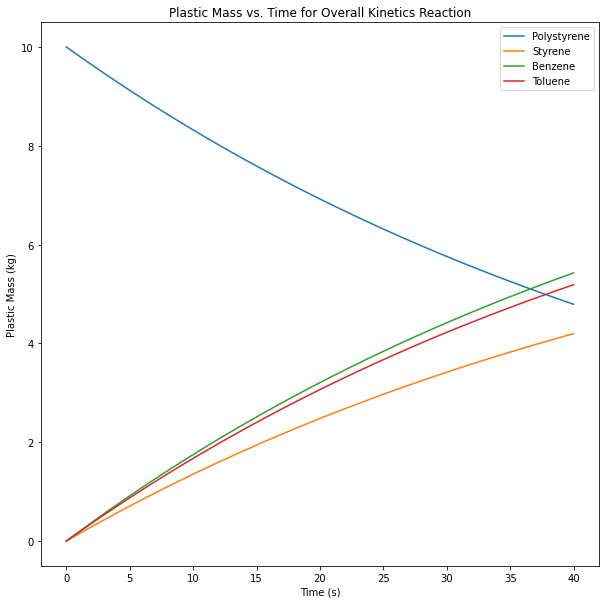

In [10]:
#Plotting the Concentrations of the Reactant and Products
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t_interval, Y_out_PS)
ax.legend(['Polystyrene', 'Styrene', 'Benzene', 'Toluene'])
ax.set_ylabel('Plastic Mass (kg)')
ax.set_xlabel('Time (s)')
ax.set_title('Plastic Mass vs. Time for Overall Kinetics Reaction')